Jupyter Notebook
=================

Ruonan Li, 001433201 Chemeng 788 Assignment 4

#Part 2 Apply the filter to a random image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Read the image by using the cv2 command

In [2]:
img = cv2.imread("1.jpg")

Present the original image.

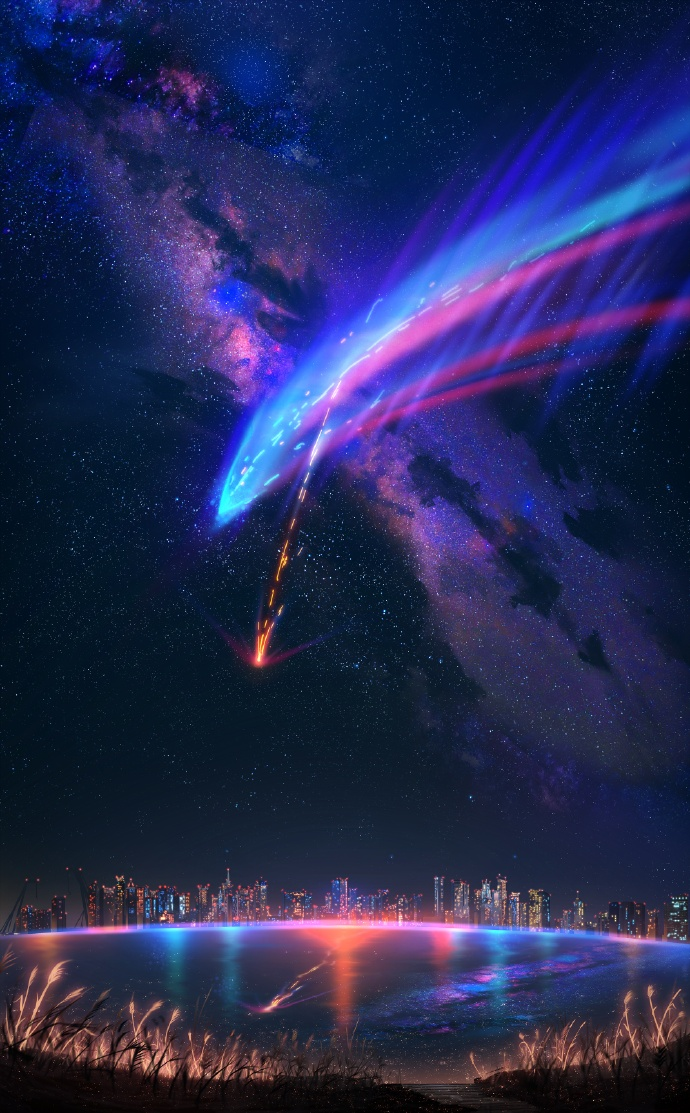

In [3]:
cv2_imshow(img)

Check the shape of the original image

In [4]:
img.shape

(1113, 690, 3)

Define the costumer filter and apply to the original image. As shown in the figure below, the filter takes edges of the image.

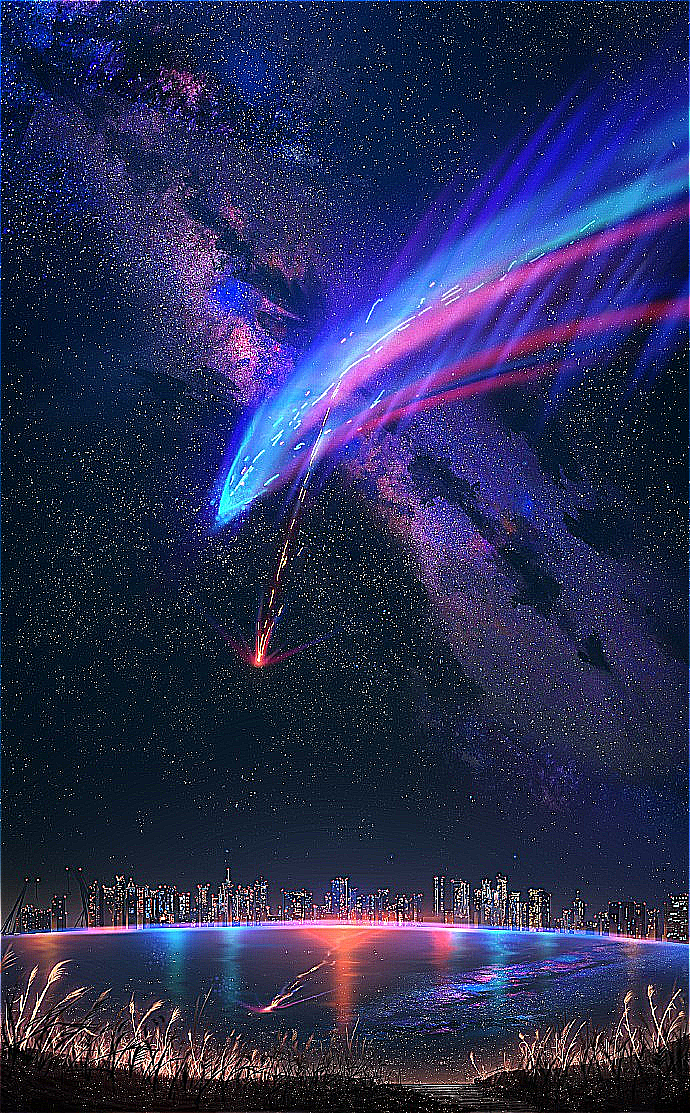

In [7]:
def conv(image, kernel, mode='same'):
    if mode == 'fill':
        h = kernel.shape[0] // 2
        w = kernel.shape[1] // 2

        image = np.pad(image, ((h, h), (w, w), (0, 0)), 'constant')
    conv_b = _convolve(image[:, :, 0], kernel)
    conv_g = _convolve(image[:, :, 1], kernel)
    conv_r = _convolve(image[:, :, 2], kernel)
    res = np.dstack([conv_b, conv_g, conv_r])
    return res

def _convolve(image, kernel):
    h_kernel, w_kernel = kernel.shape
    h_image, w_image = image.shape

    res_h = h_image - h_kernel + 1
    res_w = w_image - w_kernel + 1

    res = np.zeros((res_h, res_w), np.uint8)
    for i in range(res_h):
        for j in range(res_w):
            res[i, j] = normal(image[i:i + h_kernel, j:j + w_kernel], kernel)
    return res

def normal(image, kernel):
    res = np.multiply(image, kernel).sum()
    if res > 255:
      return 255
    elif res < 0:
      return 0
    else:
      return res

if __name__ == '__main__':
    image = img

    kernel = np.array([
        [-1, -1, -1],
        [-1, 9, -1],
        [-1, -1, -1]
    ])
    res = conv(image, kernel, 'fill')
    cv2_imshow(res)
    cv2.imwrite('output.jpg', res)

#Part 3 Develop a classification model for CIFAR-10 dataset

##a. Loading data

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

###Download and prepare the CIFAR10 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step


###Varify the dataset
To verify the dataset, the first 25 images of the training set and testing set have been ploted. Additionally, they are plotted to validate the results after removing the non-animal pictures.

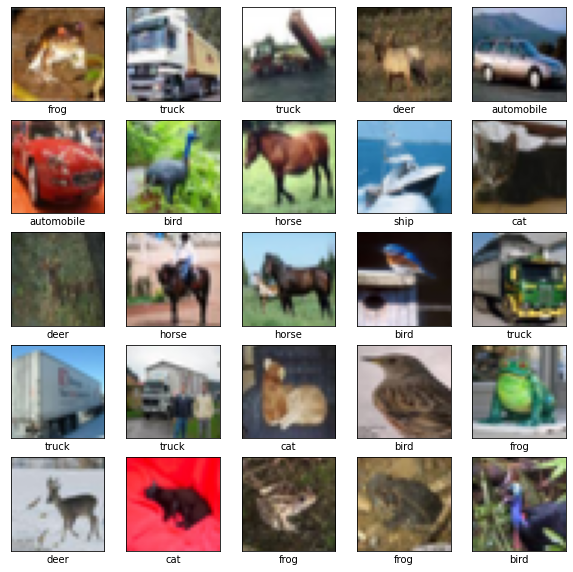

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

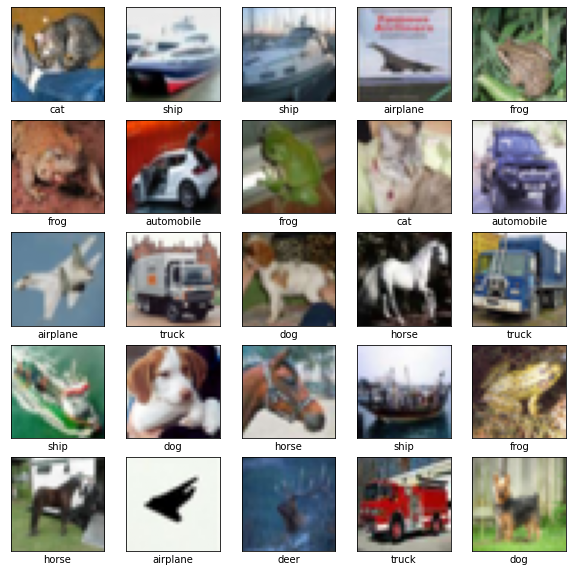

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

##b. Drop the non-animal items

###Preparation

Calcualte the number of picutres in the training set and testing set.

In [ ]:
print(len(train_images))
print(len(test_images))

50000
10000


Count the number of non-animal pictures in the training set and testing set to ensure the correct number of images are removed. 20000 pichtures muste be removed from the training set, while 4000 pictures should be removed.

In [ ]:
k = 0
l = 0
for i in train_labels:
  if i == 0 or i == 1 or i == 8 or i == 9:
    k = k+1
for i in test_labels:
  if i == 0 or i == 1 or i == 8 or i == 9:
    l = l+1
print(k)
print(l)

20000
4000


###Drop the data

Generate the filter arrays and then use the filter arrys to remove the non-animal pictures.

In [ ]:
filter_arr_train = []
filter_arr_test = []
for i in train_labels:
  if i == 0 or i == 1 or i == 8 or i == 9:
    filter_arr_train.append(False)
  else:
    filter_arr_train.append(True)
newtrain_images = train_images[filter_arr_train]
newtrain_labels = train_labels[filter_arr_train]

for i in test_labels:
  if i == 0 or i == 1 or i == 8 or i == 9:
    filter_arr_test.append(False)
  else:
    filter_arr_test.append(True)
newtest_images = test_images[filter_arr_test]
newtest_labels = test_labels[filter_arr_test]

###Validation

Calculate the new size of the training set and testing set. Since as shown in the equations below, the length of the new sets matches with the expected values, the data remove is successfule.

Training set: 50000(original size)-20000(removal) = 30000

Testing set: 10000(original size)-4000(removal) = 6000

In [ ]:
print(len(newtrain_images))
print(len(newtest_images))

30000
6000


Plot the first 25 images and their labels for both the trainig and testing set. Compared the results with the original data set to ensure:

1. Non-animal pictures picutres are removed
2. Images and labels match to each others

As shown in the two figures below, there isn't non-animal picutres. Additionally, the images and labels are correctly related; therefore, the data removal is successful.

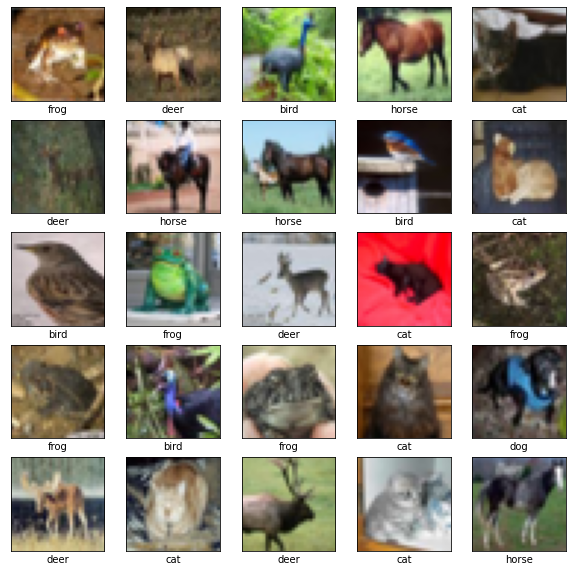

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(newtrain_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[newtrain_labels[i][0]])
plt.show()

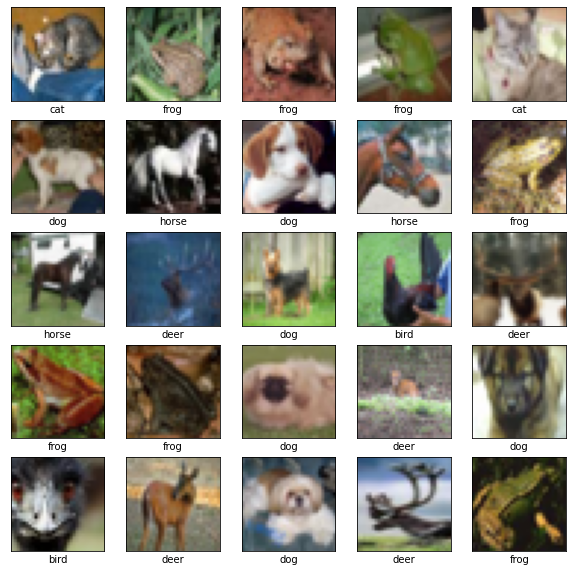

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(newtest_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[newtest_labels[i][0]])
plt.show()

##c.Turn on GPU in colab

GPU in colab has been turned on and tested by the following codes

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


##d.CNN network design and elaboration

To effectively design the CNN network in a short time, in this assignmet, the example that shown in the class will be used as the base to construct the CNN network.

###Design of the CNN

To find the best design of the convolution and pooling layer, the following combinations haved been tested manually.

Convolution layer:
1. Number of convolution layer: 3
2. The number of filters for each layer: [512,256,128,64,32]
3. Kernel size: 3x3 

  This is fixed because a lot of CNN network developed for the dataset use a kernel size of 3x3
4. Stride: 1 
  
  This is fixed to get maximum information from each convolution layer and decrease the testing iterations
5. Padding: same 

  This is fixed to decrease the testing iterations and extract sufficient information.
6. Activation function: 'relu' 

  This is fixed since 1. the activation function has a high accuracy 2. decrease the testing iterations

Pooling layer:

Both the average and max pooling layer with size of 2*2 and a stride of 2 have been tested. The size and stirde are fixed to avoid a large amount of testing iterations.

Fully connected layer:
1. Number of hidden layers: 1, 2, 3
2. Number of neurons of each hidden layer: 

  [256,128,64,32,16] (one hidden layer); 

  1st: [256,128,64,32], 2nd: [128,64,32,16] (two hidden layers); 

  1st: [256,128,64], 2nd: [128,64,32], 3rd: [64,32,16] (three hidden layers)

  These combinations are selected to ensure the hidden layers follow a tunnel shape.
3. Activation function: 'relu' for all hiden layer, 'softmax' for the last layer
4. Optimizer: 'adam'

  This is selected since it has an high performance and also to decrease the testing iterations.
5. Loss function: 'SparseCategoricalCrossentropy'

  This is selected since the problem is a classification problem with interger outputs.



In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers

In [ ]:
x1 = [128,64,32]
x2 = [512,256,128,64,32]
testrec = []
trainrec = []
for i in x1:
  for j in x2:
    for k in x2:
      model = models.Sequential()
      model.add(layers.Conv2D(i, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
      model.add(layers.AveragePooling2D((2, 2)))
      model.add(layers.Conv2D(j, (3, 3), activation='relu'))
      model.add(layers.AveragePooling2D((2, 2)))
      model.add(layers.Conv2D(k, (3, 3), activation='relu'))
      model.add(layers.AveragePooling2D((2, 2)))
      model.add(layers.Flatten())
      model.add(layers.Dense(256, activation='relu'))
      model.add(layers.Dense(64, activation='relu'))
      model.add(layers.Dense(32, activation='relu'))
      model.add(layers.Dense(10,activation='softmax'))
      model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
      epochs=20
      history = model.fit(newtrain_images, newtrain_labels, epochs=epochs, 
                      validation_split=0.2, verbose=0)
      train_loss, train_acc = model.evaluate(newtrain_images, newtrain_labels, verbose=1)
      test_loss, test_acc = model.evaluate(newtest_images, newtest_labels, verbose=1)
      testrec.append(test_acc)
      trainrec.append(train_acc)
print('\nTest loss:', testrec)
print('\nTest accuracy:', trainrec)

188/188 [==============================] - 0s 2ms/step - loss: 1.1326 - accuracy: 0.6185

Test loss: [0.6741666793823242, 0.6626666784286499, 0.671999990940094, 0.668833315372467, 0.6513333320617676, 0.6696666479110718, 0.6809999942779541, 0.6783333420753479, 0.6813333630561829, 0.6589999794960022, 0.6765000224113464, 0.6801666617393494, 0.6660000085830688, 0.6498333215713501, 0.6549999713897705, 0.6803333163261414, 0.6578333377838135, 0.6503333449363708, 0.656499981880188, 0.6576666831970215, 0.640999972820282, 0.6306666731834412, 0.5916666388511658, 0.6110000014305115, 0.6318333148956299, 0.7056666612625122, 0.6763333082199097, 0.6859999895095825, 0.6890000104904175, 0.6866666674613953, 0.6833333373069763, 0.6883333325386047, 0.7009999752044678, 0.6791666746139526, 0.6769999861717224, 0.671999990940094, 0.6696666479110718, 0.6801666617393494, 0.6669999957084656, 0.6781666874885559, 0.6678333282470703, 0.6840000152587891, 0.6664999723434448, 0.6648333072662354, 0.6653333306312561, 0.6

By performing the search above, it was found that when the CNN network has the following structure, accuracy of the training set and testing set reach the highest accuracy of 94.0% and 71.2%. Therefore, the structure of the CNN network has been set as the following.

Convolution layer sizes: (64,256,512)

Fully connected layer size: 256

However, the accuracy of the testing set is still low; therefore, after reading other works on the CNN network for the CIFAR-10 dataset, the following changes have been performed to increase the prediction accuracy：
1. Duplicate the convolution layers
2. Adding Batch normalization layers to each convolution layer.
3. Number of epoch: 50

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
 
model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
 
model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
epochs=50
history = model.fit(newtrain_images, newtrain_labels, epochs=epochs, 
                      validation_split=0.2)
test_loss, test_acc = model.evaluate(newtest_images, newtest_labels, verbose=1)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/50
750/750 [==============================] - 15s 19ms/step - loss: 2.2751 - accuracy: 0.3678 - val_loss: 1.5638 - val_accuracy: 0.4392
Epoch 2/50
750/750 [==============================] - 14s 18ms/step - loss: 1.0825 - accuracy: 0.5877 - val_loss: 1.3844 - val_accuracy: 0.4923
Epoch 3/50
750/750 [==============================] - 14s 18ms/step - loss: 0.8697 - accuracy: 0.6758 - val_loss: 1.0900 - val_accuracy: 0.5780
Epoch 4/50
750/750 [==============================] - 14s 18ms/step - loss: 0.7334 - accuracy: 0.7336 - val_loss: 1.2120 - val_accuracy: 0.5932
Epoch 5/50
750/750 [==============================] - 14s 18ms/step - loss: 0.6084 - accuracy: 0.7834 - val_loss: 0.7400 - val_accuracy: 0.7390
Epoch 6/50
750/750 [==============================] - 14s 19ms/step - loss: 0.4921 - accuracy: 0.8260 - val_loss: 0.7795 - val_accuracy: 0.7337
Epoch 7/50
750/750 [==============================] - 14s 19ms/step - loss: 0.3891 - accuracy: 0.8631 - val_loss: 1.0682 - val_accuracy:

###Further tune the model
As shown above, with the current CNN netwrok structure, the accuracy of the training set is 99.0% and the accuracy of the testing set is 79.5%. Since the accuracy difference between the training and testing set is over 20%, the model faces an overfitting issue. In order to solve the issue, meanwhile further increase accuracy of the model, the following hypermaters have been changed and tested with different values. The values which provide the best accuracy are shown below.

1. Regularization: 1e-4

  As shown below, the model achieves the highest training and testing accuracy when the regularization is 1e-4. Therefore, the value has been selected.
  
  0.1: training: 0.7356, testing: 0.5785; 
  
  0.01: training: 0.8777, testing: 0.7218; 
  
  1e-3: training: 0.9521, testing: 0.7667; 
  
  1e-4: training: 0.9809, testing: 0.7845; 
  
  1e-5: training: 0.9877, testing: 0.7779;

2. Dropout rate: (0.4,0.4,0.5) for the convolution layer, 0.5 for the fully connected layer.

  In order to select the best combination of the dropout rate, the dropout rate (0.2,0.3,0.4,0.5) has been firstly applied to the convolution and fully connected layer. It was found that the accuracy of the training set is 0.9504, and the accuracy for the testing set is 0.8468. Since there is still a huge difference between the training and testing set, the minimum dropout rate for each layer was set as 0.3. Then the following combinations have been tested.

  (0.3,0.4,0.5,0.5): trainig set: 0.9526; testing set: 0.8482
  
  (0.4,0.3,0.4,0.5): trainig set: 0.9490; testing set: 0.8463
  
  (0.4,0.4,0.5,0.5): trainig set: 0.9243; testing set: 0.8548

  (0.4,0.5,0.5,0.5): trainig set: 0.9140; testing set: 0.8326
  
  (0.5,0.5,0.5,0.5): trainig set: 0.9030; testing set: 0.8507

  Since under the combination (0.4,0.4,0.5,0.5) 1. accuracy for the testing set is the highest, 2. accuracy difference between the training and testing set is the lowest. Therefore, the dropout rate combination has been selected.

3. Learning rate: 1e-3

  To select the suitable learning rate, the following learning rates have been tested. However, as shown below, when the learning rate is at the deafult value - 0.001, the model provides the highest accuracy. Therefore, the learning rate remain unchanged.

  0.1: trainig set: 0.1728, testing set: 0.167; 
  
  0.01: trainig set: 0.5690, testing set: 0.523; 
  
  1e-3: trainig set: 0.9243; testing set: 0.8548; 
  
  1e-4: trainig set: 0.9818; testing set: 0.8493; 

4. Mini-batch size (training set): 32

  The following batch sizes for the training set has been tested. According to the result, increase the batch size does not imporve the model; therefore, the batch size remain unchanged.

  32: trainig set: 0.9243; testing set: 0.8548;
  
  64: trainig set: 0.9464; testing set: 0.8470; 
  
  128: trainig set: 0.9695; testing set: 0.8157; 
  
  256: trainig set: 0.9746; testing set: 0.8297;

5. Batch size (testing set): 32

  It was found that changing the batch size of the testing set does not affect accuracy of the model; therefore, the batch size for the testing set remains unchanged.

5. Number of epoch: 200

  Upon ploting the change of the accuracy and loss of the training set and validation set, it was found that, when the number of epoch was set as 50 and 100, the loss for both the trainig set and the testing set can be further imporved, as shown in the figure below.
  
  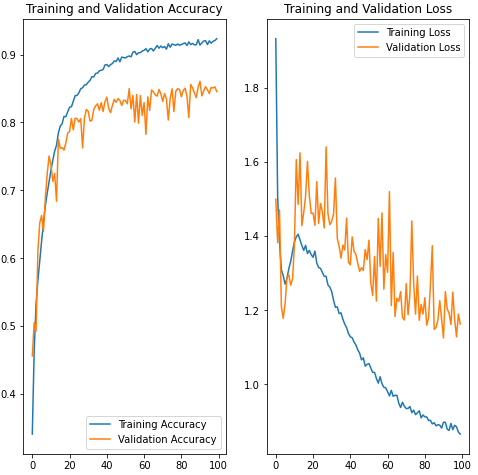
  
   Therefore, the number of epoch was further increased to 200. As shown in the figure below, the decrease of the loss becomes less significant.

In [ ]:
model = models.Sequential()
weight_decay = 1e-4
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))
 
model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))
 
model.add(layers.Conv2D(512, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(BatchNormalization())
model.add(layers.Conv2D(512, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
epochs=200
batch=64
history = model.fit(newtrain_images, newtrain_labels, epochs=epochs, 
                      validation_split=0.2, verbose=1)
test_loss, test_acc = model.evaluate(newtest_images, newtest_labels,verbose=1)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/200
750/750 [==============================] - 16s 20ms/step - loss: 2.5365 - accuracy: 0.3134 - val_loss: 1.7918 - val_accuracy: 0.3118
Epoch 2/200
750/750 [==============================] - 14s 19ms/step - loss: 1.5198 - accuracy: 0.4578 - val_loss: 2.0840 - val_accuracy: 0.3343
Epoch 3/200
750/750 [==============================] - 14s 19ms/step - loss: 1.3926 - accuracy: 0.5280 - val_loss: 1.3343 - val_accuracy: 0.5553
Epoch 4/200
750/750 [==============================] - 15s 19ms/step - loss: 1.2881 - accuracy: 0.5758 - val_loss: 1.2196 - val_accuracy: 0.6133
Epoch 5/200
750/750 [==============================] - 15s 20ms/step - loss: 1.2425 - accuracy: 0.6150 - val_loss: 1.3047 - val_accuracy: 0.5903
Epoch 6/200
750/750 [==============================] - 15s 20ms/step - loss: 1.2182 - accuracy: 0.6463 - val_loss: 1.2194 - val_accuracy: 0.6638
Epoch 7/200
750/750 [==============================] - 15s 20ms/step - loss: 1.2564 - accuracy: 0.6649 - val_loss: 1.2991 - val_ac

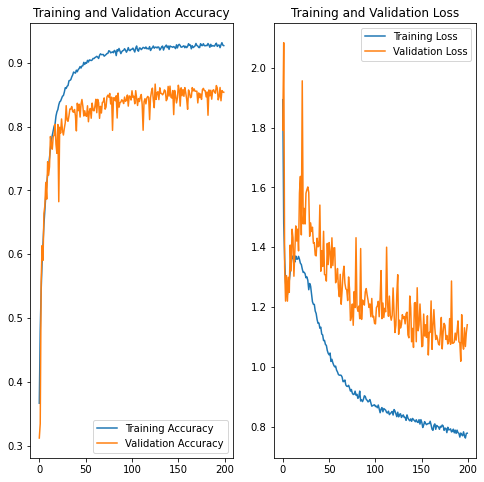

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##e. Model evaluation
As shown above, the model is tuned by checking:
1. Accuracy of the testing set.
2. The change of the loss and accuracy of the training and testing set.

The corresponding results for the model developed are shown below. The accuracy of the testing set is 85.75%. The accuracy on the training set is 92.95%. Accuracy of the model is not very high, it may due to the number of training data is not enough.

Accuracy and loss for both the training and testing sets are shown in the figure above. The variances of all sets are in a small range; therefore, the model is reasonalbe.

In [ ]:
test_loss, test_acc = model.evaluate(newtest_images, newtest_labels, verbose=1)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

188/188 [==============================] - 1s 6ms/step - loss: 1.1286 - accuracy: 0.8575

Test loss: 1.1286121606826782

Test accuracy: 0.8575000166893005


##f. Model prediction
To check performace of the model, as shown below, predictions on the testing set have been made. Here, the 35th image has been selected for prediction. The model indicates the image belongs to class 8 which is a graph for hourse. It matches to the real category of the data. Thus, the model built has a high accuracy.

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 
               'deer','dog', 'frog', 'horse',
               'ship', 'truck']
predictions = model.predict(newtest_images)
predictions[35]

array([0.0000000e+00, 0.0000000e+00, 6.6111515e-13, 1.5677483e-13,
       2.7777010e-06, 4.6553675e-10, 2.3232001e-16, 9.9999726e-01,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

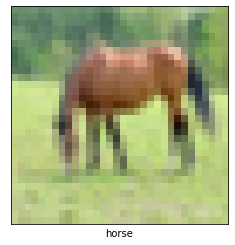

In [ ]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(newtest_images[35], cmap=plt.cm.binary)
plt.xlabel(class_names[newtest_labels[35][0]])
plt.show()